In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.1)


In [2]:
import numpy as np # vectors etc
import matplotlib.pyplot as plt # for plotting

In [3]:
np.random.seed(0)

X = np.random.multivariate_normal([0, 0], [[4, 0],[0, 4]], size=200)
y = [0]*X.shape[0]
X = np.concatenate([X, np.random.multivariate_normal([5, 3], [[1, 0],[0, 1]], size=100)])
y.extend([1]*(X.shape[0]-len(y)))
X = np.concatenate([X, np.random.multivariate_normal([-3, 8], [[1, 0],[0, 1]], size=50)])
y.extend([2]*(X.shape[0]-len(y)))
y = np.asarray(y)
data = [(X, y)]

X = np.vstack(np.linspace(-60, 60, 200)*(np.pi/180))
X = np.concatenate([np.cos(X), np.sin(X)], axis=1)*10
X += np.random.normal(0, 1, size=X.shape)
y = [0]*X.shape[0]
X = np.concatenate([X, np.random.multivariate_normal([0, 0], [[2, 0],[0, 2]], size=100)])
y.extend([1]*(X.shape[0]-len(y)))
y = np.asarray(y)
data.append((X, y))

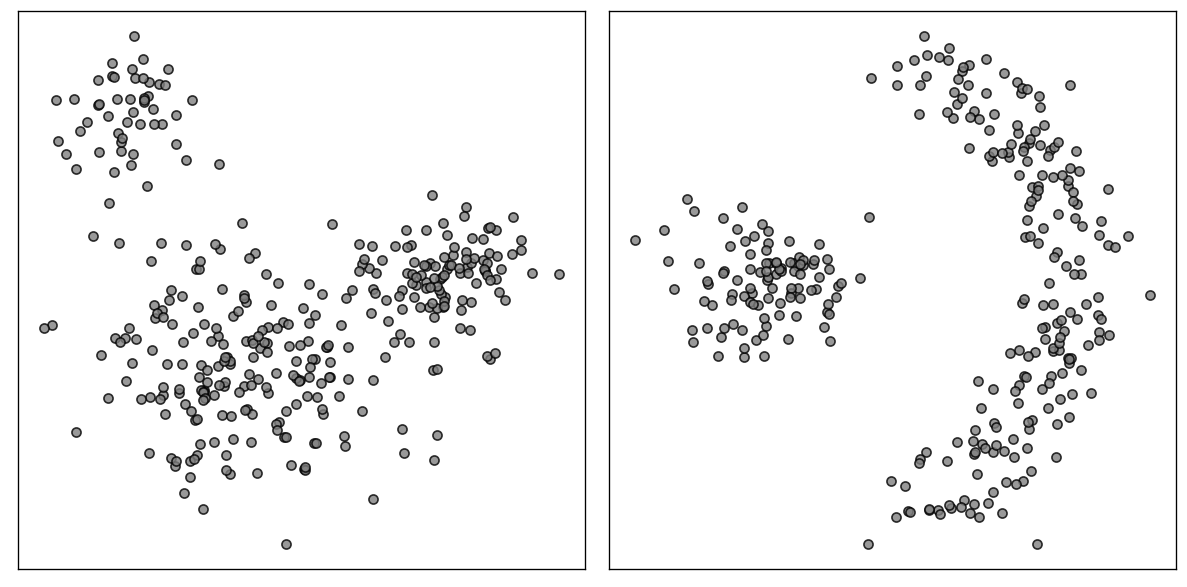

In [4]:
fig = plt.figure(figsize=(10, 5), dpi=120)
ax = fig.subplots(1, 2)
for i, (X, y) in enumerate(data):
  ax[i].scatter(X[:, 0], X[:, 1], c='gray', s=30, marker='o', edgecolor='k', alpha=.8)
  ax[i].set_xticks([])
  ax[i].set_yticks([])
fig.tight_layout()
fig.show()

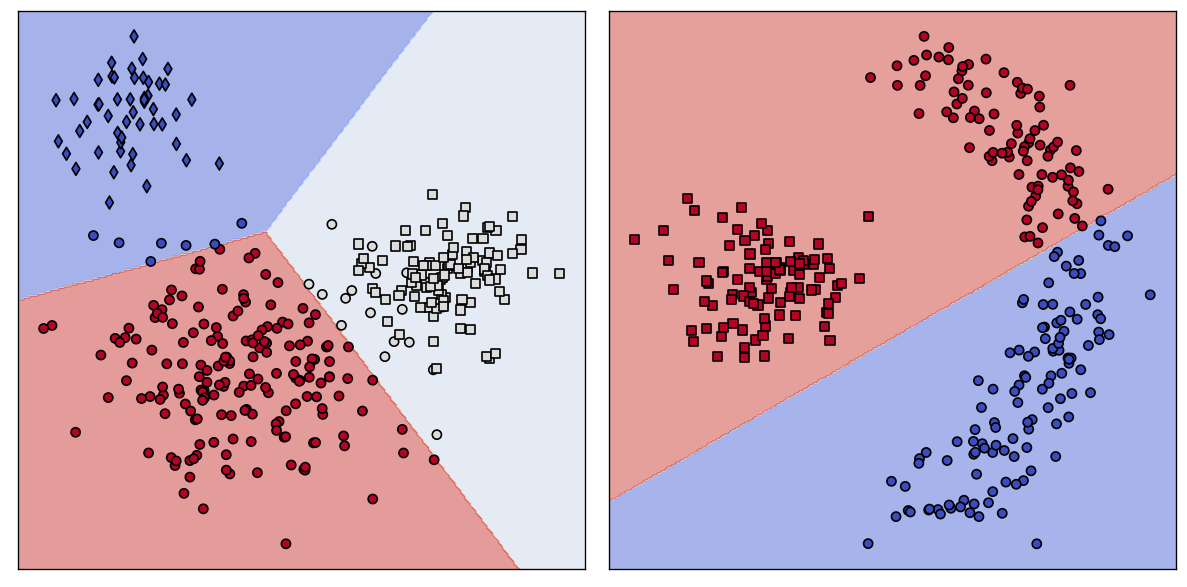

In [5]:
from sklearn.cluster import KMeans
models = [KMeans(n_clusters=3), KMeans(n_clusters=2)]
for i, (X, y) in enumerate(data):
  models[i].fit(X)

fig = plt.figure(figsize=(10, 5), dpi=120)
ax = fig.subplots(1, 2)

for i, (X, y) in enumerate(data):
  markers = ['o', 's', 'd']
  y_hat = models[i].predict(X)
  for j, label in enumerate(np.unique(y)):
    ax[i].scatter(X[y==label, 0], X[y==label, 1], c=y_hat[y==label], s=30, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())

  a = ax[i].axis()
  XX, YY = np.meshgrid(np.linspace(a[0], a[1], 300),
                      np.linspace(a[2], a[3], 300))
  Z = models[i].predict(np.concatenate([np.vstack(XX.ravel()), 
                                        np.vstack(YY.ravel())], axis=1))
  ax[i].contourf(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', zorder=-1)#, levels=np.arange(y.min()+0.5, y.max()))
  # ax[i].pcolor(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', edgecolors='none', snap=True, zorder=-1)

  ax[i].set_xticks([])
  ax[i].set_yticks([])
fig.tight_layout()
fig.show()

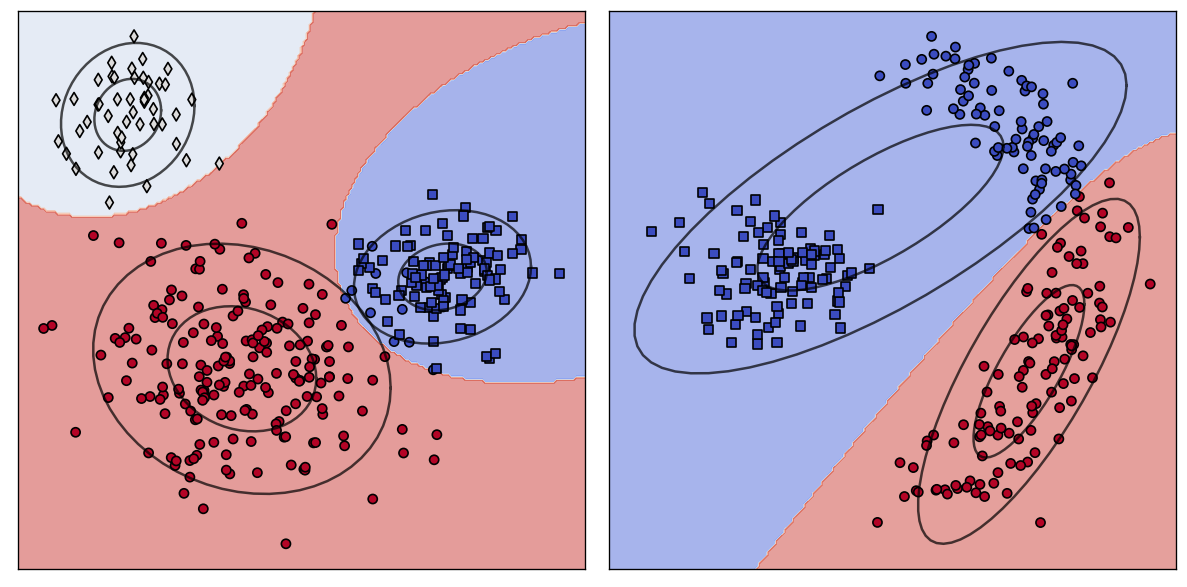

In [6]:
from sklearn.mixture import GaussianMixture
models = [GaussianMixture(n_components=3), GaussianMixture(n_components=2)]

for i, (X, y) in enumerate(data):
  models[i].fit(X)

fig = plt.figure(figsize=(10, 5), dpi=120)
ax = fig.subplots(1, 2)
for i, (X, y) in enumerate(data):
  markers = ['o', 's', 'd']
  y_hat = models[i].predict(X)
  for j, label in enumerate(np.unique(y)):
    ax[i].scatter(X[y==label, 0], X[y==label, 1], c=y_hat[y==label], s=30, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())

  for k in range(models[i].means_.shape[0]):
    for sd in range(1, 3):
      c = np.vstack(np.linspace(0, 2*np.pi, 60))
      c = np.concatenate([np.cos(c), np.sin(c)], axis=1)*sd
      c = c.dot(np.linalg.cholesky(models[i].covariances_[k]).T)
      ax[i].plot(c[:, 0]+models[i].means_[k, 0], c[:, 1]+models[i].means_[k, 1], 'k', alpha=.7)

  a = ax[i].axis()
  XX, YY = np.meshgrid(np.linspace(a[0], a[1], 200),
                      np.linspace(a[2], a[3], 200))
  Z = models[i].predict(np.concatenate([np.vstack(XX.ravel()), 
                                        np.vstack(YY.ravel())], axis=1))
  ax[i].contourf(XX, YY, Z.reshape(XX.shape), alpha=.5, cmap='coolwarm', zorder=-2)

  ax[i].set_xticks([])
  ax[i].set_yticks([])
fig.tight_layout()
fig.show()

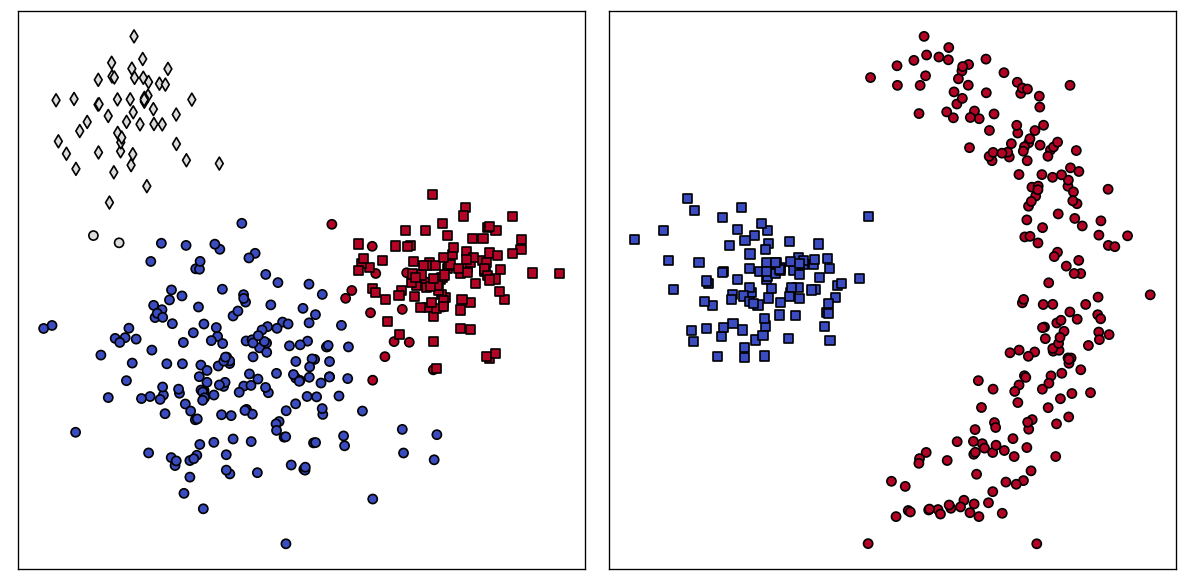

In [7]:
from sklearn.cluster import AgglomerativeClustering
# models = [AgglomerativeClustering(n_clusters=3, linkage='ward'), AgglomerativeClustering(n_clusters=2, linkage='ward')]
# models = [AgglomerativeClustering(n_clusters=3, linkage='complete'), AgglomerativeClustering(n_clusters=2, linkage='complete')]
# models = [AgglomerativeClustering(n_clusters=3, linkage='average'), AgglomerativeClustering(n_clusters=2, linkage='average')]
# models = [AgglomerativeClustering(n_clusters=3, linkage='single'), AgglomerativeClustering(n_clusters=2, linkage='single')]

models = [AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True), AgglomerativeClustering(n_clusters=2, linkage='single', compute_distances=True)]

fig = plt.figure(figsize=(10, 5), dpi=120)
ax = fig.subplots(1, 2)
for i, (X, y) in enumerate(data):
  markers = ['o', 's', 'd']
  y_hat = models[i].fit_predict(X)
  for j, label in enumerate(np.unique(y)):
    ax[i].scatter(X[y==label, 0], X[y==label, 1], c=y_hat[y==label], s=30, marker=markers[j], edgecolor='k', cmap='coolwarm', vmin=y.min(), vmax=y.max())
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  # ax[i].axis('equal')
fig.tight_layout()
fig.show()

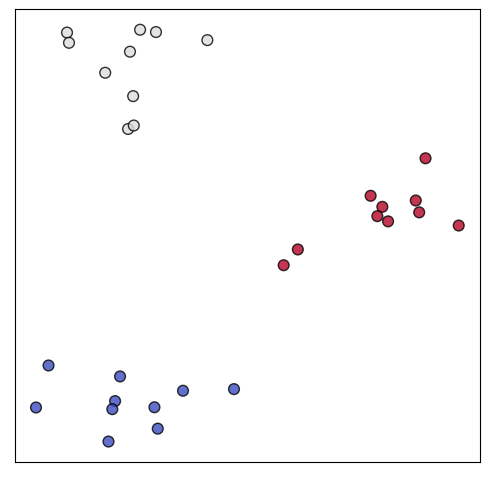

In [8]:
X = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], size=10)
y = [0]*X.shape[0]
X = np.concatenate([X, np.random.multivariate_normal([0, 10], [[1, 0],[0, 1]], size=10)])
y.extend([1]*(X.shape[0]-len(y)))
X = np.concatenate([X, np.random.multivariate_normal([5, 5], [[1, 0],[0, 1]], size=10)])
y.extend([2]*(X.shape[0]-len(y)))

# model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward', compute_distances=True)
y_hat = model.fit_predict(X)

plt.figure(figsize=(6, 6), dpi=100)
plt.scatter(X[:, 0], X[:, 1], c=y, s=60, marker='o', edgecolor='k', alpha=.8, cmap='coolwarm')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
y_hat

array([21, 18, 29, 27, 20, 28, 17, 22, 15, 24, 14, 25, 13, 26,  6, 16, 19,
       10, 12,  8,  7,  3, 23,  9,  4, 11,  5,  2,  1,  0])

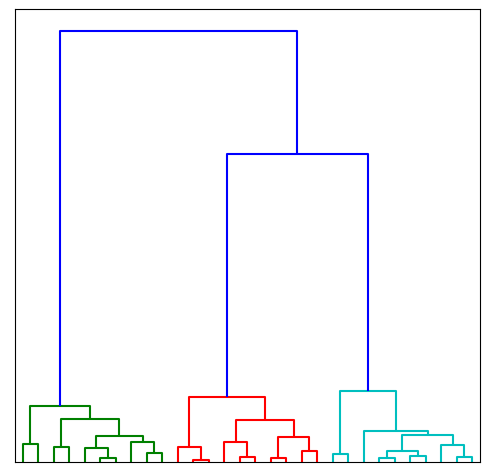

In [10]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.figure(figsize=(6, 6), dpi=100)
plot_dendrogram(model, truncate_mode='level', p=10)
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model.children_

array([[10, 12],
       [ 5,  9],
       [27, 28],
       [13, 17],
       [11, 14],
       [25, 26],
       [22, 23],
       [24, 29],
       [ 0,  4],
       [32, 36],
       [16, 19],
       [ 1, 31],
       [ 6,  8],
       [15, 30],
       [20, 35],
       [ 2,  7],
       [ 3, 38],
       [18, 34],
       [33, 40],
       [41, 46],
       [39, 44],
       [21, 50],
       [47, 48],
       [42, 49],
       [45, 53],
       [43, 52],
       [37, 51],
       [55, 56],
       [54, 57]])

In [12]:
model.distances_


array([ 0.14759736,  0.23729274,  0.25369062,  0.29628188,  0.31036587,
        0.34691757,  0.38801381,  0.52780441,  0.61737563,  0.72836105,
        0.76754188,  0.96190983,  0.97461015,  1.03233418,  1.10795634,
        1.22940683,  1.30912423,  1.34286238,  1.66936888,  1.70720692,
        1.83146174,  2.09851514,  2.78449292,  2.85493955,  3.74627329,
        4.34897827,  4.74203295, 20.54755026, 28.81577418])